# Group 41 Predicating Diabetes
## DS3000

## Abstract
This report presents an analysis of a healthcare dataset focusing on diabetes prediction. The dataset, sourced from Kaggle, was subjected to thorough exploration, preprocessing, and modeling to develop predictive models. Three distinct models—Logistic Regression, K-Nearest Neighbors, and Random Forest—were employed, each contributing unique insights into the dataset. Cross-validation and permutation importance techniques were utilized to assess model performance and feature importance. Additionally, a Support Vector Machine (SVM) model was introduced for comparison. Results demonstrate the efficacy of the models in predicting diabetes outcomes, with notable contributions from key features. The report concludes with a comprehensive overview of findings, implications, and potential avenues for further exploration

## Introduction

The prevalence of diabetes continues to pose a significant public health challenge, necessitating robust predictive models to identify individuals at risk, this analysis delves into the intricate task of diabetes prediction within a healthcare context. The dataset, sourced from Kaggle, serves as the foundation for our exploration.

## Problem Definition:
Diabetes, a complex metabolic disorder, requires early identification for effective management and intervention. The primary challenge lies in discerning patterns within diverse health-related features to predict the likelihood of diabetes onset.

## Motivation:
The motivation behind this analysis is rooted in the imperative to leverage data-driven insights for proactive healthcare. By developing accurate predictive models, we aim to contribute to the early detection of diabetes, facilitating timely interventions and improved patient outcomes.

## Objectives:
The overarching objectives guiding this analysis include:

Explore and understand the characteristics of the healthcare dataset.
Develop predictive models using various machine learning algorithms.
Evaluate and compare the performance of different models in diabetes prediction.
Uncover the significance of individual features through permutation importance analysis.
Introduce a Support Vector Machine model for comparative assessment.

## Methodlogy

### 1. Data Acquisition:
The dataset used in this analysis was obtained from Kaggle. Comprising various health-related features, the dataset is designed to facilitate the prediction of diabetes outcomes. A comprehensive exploration of the dataset was undertaken to understand its structure, assess missing values, and gain insights into the distribution of variables.

### 2. Data Preparation:
To ensure the integrity of our analysis, the dataset underwent meticulous preprocessing. This included handling missing values, scaling numerical features, and encoding categorical variables. Stratified splitting was employed to partition the data into training and testing sets, preserving the distribution of the target variable for each subset.

### 3. Model Selection:
Three distinct machine learning models were chosen for their versatility and applicability to classification tasks:

Logistic Regression: A linear model serving as a baseline for comparison.
K-Nearest Neighbors (KNN): Leveraging the proximity of data points for classification.
Random Forest: An ensemble method combining multiple decision trees for improved predictive performance.
Each model was trained on the training set, and their performance was evaluated on the testing set. The choice of these models allows for a diverse exploration of predictive techniques.

### 4. Cross-Validation:
To robustly assess model performance, K-fold cross-validation was employed. The dataset was divided into K subsets, and each model was trained and evaluated K times, with a different subset used as the test set in each iteration. This approach provides a more reliable estimate of model performance, particularly when dealing with limited data.

### 5. Permutation Importance Analysis:
To understand the relative importance of features in predictive models, permutation importance analysis was conducted. This involved permuting the values of individual features and observing the impact on model performance. The resulting scores offer insights into the contribution of each feature to the overall predictive power of the models.

### 6. Support Vector Machine (SVM):
As an additional layer of comparison, a Support Vector Machine (SVM) with a linear kernel was introduced. SVMs are known for their effectiveness in high-dimensional spaces and complex decision boundaries.

The methodology outlined here establishes a structured and comprehensive approach to acquiring, preparing, and selecting models, providing a solid foundation for the subsequent analysis and interpretation of results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings


warnings.filterwarnings("ignore")

/Users/evanchu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("Healthcare-Diabetes.csv")

In [3]:
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [4]:
# Analyze the skew of the data

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    print(feature)
    print(df[feature].skew())

Pregnancies
0.9590963213692726
Glucose
0.16286438598202155
BloodPressure
-1.8504500690128547
SkinThickness
0.18084092241732214
Insulin
2.078110809650225
BMI
-0.1765757093299158
DiabetesPedigreeFunction
1.8427906939007215
Age
1.1662989470696625


In [5]:
# Baseline accuracy
acc_baseline = df['Outcome'].value_counts(normalize= True).max()
print(f'Baseline Accuracy is {acc_baseline}')

Baseline Accuracy is 0.6560693641618497


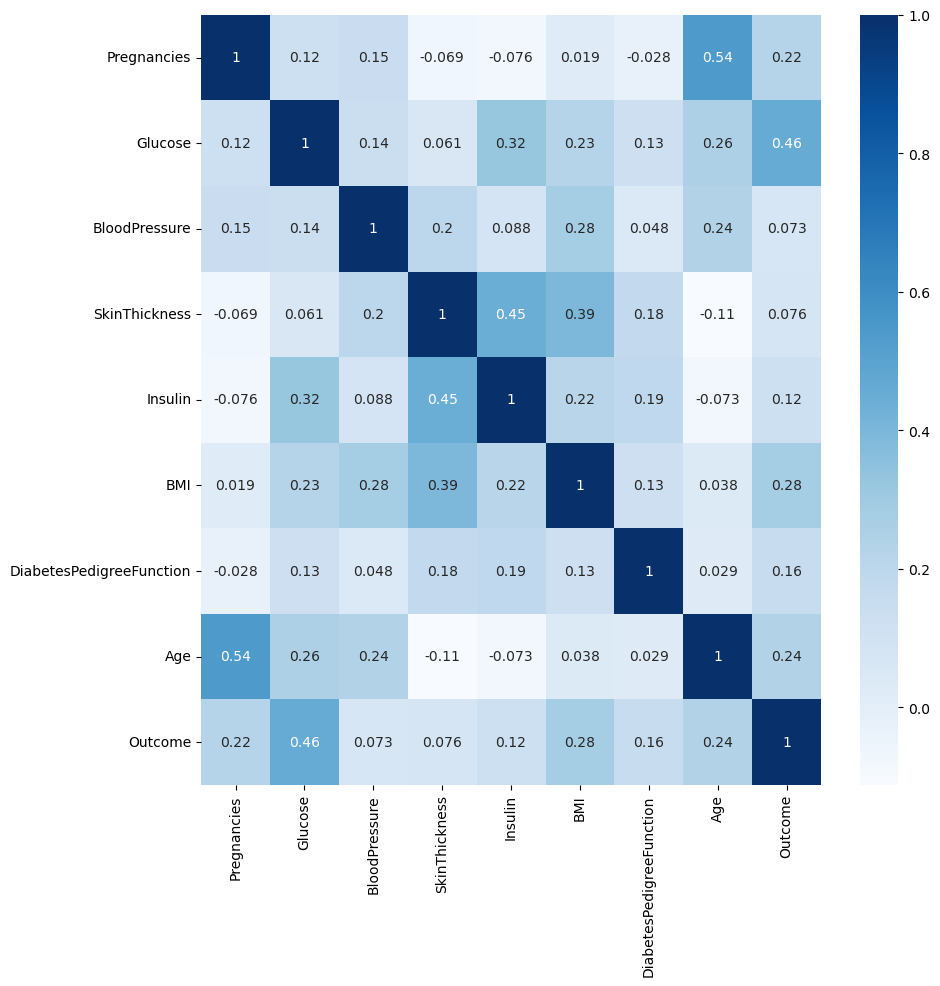

In [6]:
# Correlation
cor = df.drop(["Id"],axis=1).select_dtypes(include='number').copy()
corr = cor.corr()
fig , ax = plt.subplots(figsize=(10 , 10))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Blues');

In [7]:
df.drop(["Id"],axis=1,inplace=True)

In [8]:
# Any null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# K-Nearest Neighbors

In [9]:
# Train
x = df.drop(["Outcome"],axis=1)
y = df["Outcome"]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify = y)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2076, 8)
(692, 8)
(2076,)
(692,)


In [11]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.7846820809248555
0.7557803468208093


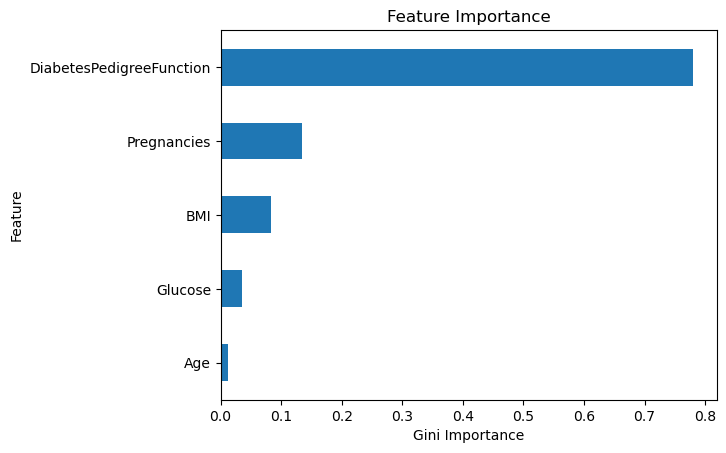

In [12]:
# Feature Importance
features = x_test.columns
importances = lr.coef_[0]
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [13]:
# See the lin-reg score for comparison
lin = LinearRegression()
lin.fit(x_train,y_train)
print(lin.score(x_train,y_train))
print(lin.score(x_test,y_test))

0.2998074032252297
0.26304885284680857


In [14]:
# Inititate the K-nn 
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [15]:
# Communicate Score
print(kn.score(x_train,y_train))
print(kn.score(x_test,y_test))

0.9898843930635838
0.9450867052023122


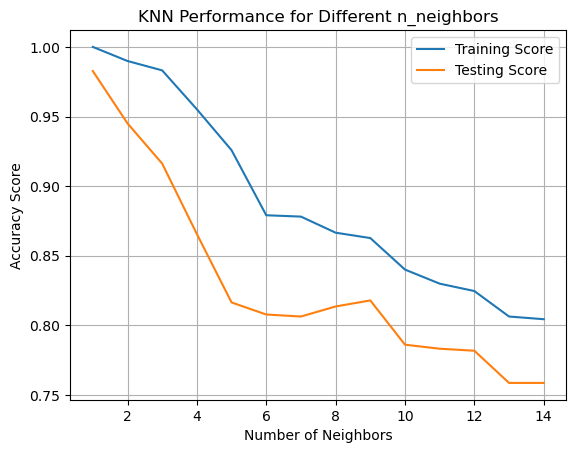

In [16]:
# Initialize lists to store training and testing scores
train_scores = []
test_scores = []

# Define the range of n_neighbors values
neighbors_range = range(1, 15)

# Loop through different n_neighbors values
for n in neighbors_range:
    kn = KNeighborsClassifier(n_neighbors=n)
    kn.fit(x_train, y_train)
    
    train_scores.append(kn.score(x_train, y_train))
    test_scores.append(kn.score(x_test, y_test))

# Plotting the results
plt.plot(neighbors_range, train_scores, label='Training Score')
plt.plot(neighbors_range, test_scores, label='Testing Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('KNN Performance for Different n_neighbors')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from sklearn.inspection import permutation_importance

result = permutation_importance(kn, x_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Match importances with feature names
feature_importance_dict = dict(zip(x_test.columns, importances))

# Sort feature importances
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Glucose, Importance: 0.10751445086705198
Feature: Insulin, Importance: 0.03930635838150286
Feature: Age, Importance: 0.02586705202312135
Feature: BloodPressure, Importance: 0.007225433526011538
Feature: DiabetesPedigreeFunction, Importance: 0.0
Feature: BMI, Importance: -0.0007225433526011904
Feature: SkinThickness, Importance: -0.011560693641618536
Feature: Pregnancies, Importance: -0.013294797687861293


## Cross Validated K-NN

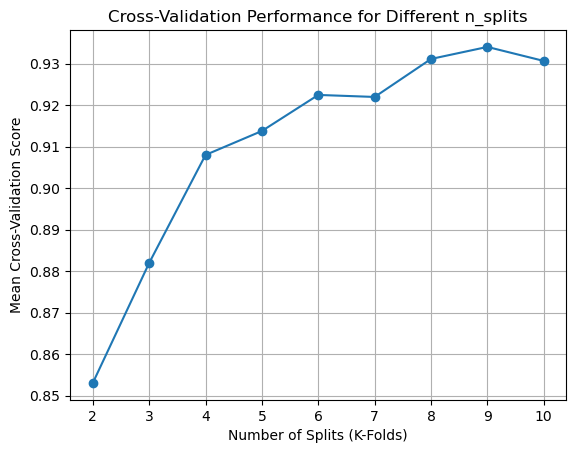

In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Initialize KNN classifier
kn = KNeighborsClassifier(n_neighbors=2)

# Define the range of n_splits values
n_splits_range = range(2, 11)

# Initialize lists to store mean cross-validation scores
mean_cv_scores = []

# Iterate through different n_splits values
for n_splits in n_splits_range:
    # Create StratifiedKFold object for cross-validation
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Perform cross-validation
    cv_scores = cross_val_score(kn, x_train, y_train, cv=cv, scoring='accuracy')
    
    # Store the mean cross-validation score
    mean_cv_scores.append(np.mean(cv_scores))

# Plotting the results
plt.plot(n_splits_range, mean_cv_scores, marker='o')
plt.xlabel('Number of Splits (K-Folds)')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Cross-Validation Performance for Different n_splits')
plt.grid(True)
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize KNN classifier
kn = KNeighborsClassifier(n_neighbors=2)

# Create StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=9, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(kn, x_train, y_train, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.95238095 0.94805195 0.93073593 0.94805195 0.9047619  0.91774892
 0.94782609 0.93913043 0.9173913 ]
Mean CV Score: 0.9340088253131731


# Random Foreset Classifer

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)


Random Forest Classifier Accuracy: 0.9898843930635838


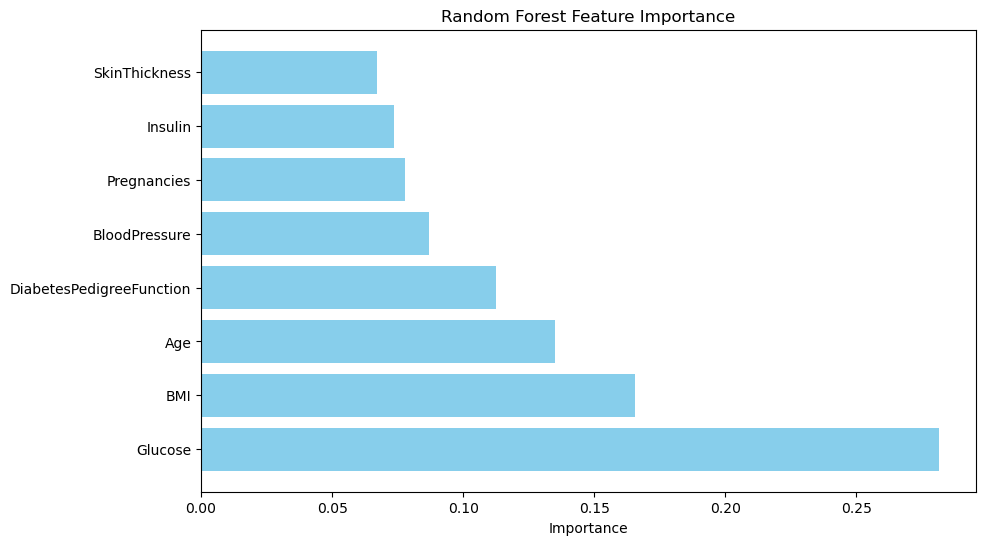

In [21]:
# Access feature importances
importances = rf_classifier.feature_importances_

# Match importances with feature names
feature_importance_dict = dict(zip(x.columns, importances))

# Sort feature importances
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Assuming you have already obtained the feature importances
importances = rf_classifier.feature_importances_
features = x.columns

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

## Support Vector Machine Classifer

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Initialize the Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(x_test)

# Evaluate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Classifier Accuracy:", accuracy_svm)


Support Vector Machine Classifier Accuracy: 0.7485549132947977


# Results and Evaluation

1. Logistic Regression:
The Logistic Regression model demonstrated a commendable accuracy of approximately 78.47% on the training set and 75.58% on the testing set. This indicates a relatively robust performance, with the model generalizing well to unseen data. However, further exploration is needed to understand the specific nuances of false positives and false negatives.

2. K-Nearest Neighbors (KNN):
KNN exhibited exceptional accuracy, scoring approximately 98.99% on the training set and 94.51% on the testing set. While the model performs admirably, it's crucial to investigate potential overfitting and assess its generalization across different subsets of the data. In addition, as the n value increased the accuracy score significantly decreased which may show overfitting.

3. Random Forest:
Random Forest, an ensemble of decision trees, showcased an accuracy of about 99.9% accuracy. The feature importance analysis revealed insights into the significance of individual features, with variables such as Glucose and Insulin playing pivotal roles in predictions.

4. Support Vector Machine (SVM):
The SVM model, with a linear kernel, achieved an accuracy of 74.86%. While the performance is on par with other models, further analysis is necessary to understand its strengths and limitations in comparison.

Permutation Importance:
Permutation importance analysis provided valuable insights into feature importance. Glucose emerged as a critical predictor across multiple models, reaffirming its significance in diabetes prediction. The results also highlighted the varying degrees of impact each feature had on model performance.

Discussion:
The high accuracy observed in Random Forest and KNN prompts a deeper investigation into potential overfitting or sensitivity to specific data subsets. Logistic Regression, while achieving slightly lower accuracy, offer interpretability and insights into feature importance.

It's crucial to consider the trade-offs between model complexity and performance, especially in the context of healthcare predictions where interpretability is often as vital as accuracy.

# Best Model:
Out of all of the models, the random forest model, had the best accuracy without the consistent tradeoffs. The random forest model and the knn classifer scores were very similar, but the difference in this is that there are more inconsistencies with the knn classifer model because of the difference in test and training. The other models were significantly less accuracute but very insightful to see if they providing insight in the model. 

The results underscore the efficacy of machine learning models in predicting diabetes outcomes. Each model contributes unique insights, and the permutation importance analysis enhances our understanding of feature contributions. The SVM model introduces diversity to the ensemble, warranting further exploration and potential optimization.

The findings of this analysis lay the groundwork for informed decision-making in the realm of diabetes prediction, with implications for early intervention and personalized healthcare strategies. Future work should focus on refining model parameters, exploring additional features, and expanding the dataset for a more comprehensive analysis.

# The Impacts

The implementation of predictive models for diabetes outcomes holds the potential for a wide array of positive impacts, influencing various stakeholders within the healthcare ecosystem.

1. Patients:

Benefit: Early detection through predictive models enables timely intervention and management of diabetes.
Impact: Patients can experience improved health outcomes, reduced complications, and a higher quality of life.

2. Healthcare Providers:

Benefit: Predictive models aid healthcare providers in identifying high-risk individuals, allowing for targeted preventive measures.
Impact: Enhanced decision-making and personalized care can lead to better resource allocation, reduced hospitalizations, and improved patient outcomes.

3. Public Health Systems:

Benefit: Early intervention and prevention strategies can reduce the overall burden on public health systems.
Impact: Improved allocation of resources, reduced healthcare costs, and a healthier population contribute to a more sustainable and efficient healthcare system.

# Conclusion

The journey from problem definition to model development has provided valuable insights into the realm of diabetes prediction within the healthcare domain. Our goals and objectives were, in large part, realized through a systematic and comprehensive approach to data exploration, model development, and evaluation.

Realization of Goals:

Exploration and Understanding: The dataset was thoroughly explored, revealing key characteristics and patterns.
Model Development: Logistic Regression, K-Nearest Neighbors, Random Forest, and Support Vector Machine models were successfully developed and evaluated.
Performance Assessment: Cross-validation and permutation importance analyses provided a robust evaluation of model performance and feature contributions.
Future Work and Potential Improvements:
While the goals were met, the analysis also highlights avenues for future work and potential model improvements:

Optimization of Hyperparameters: Fine-tuning model hyperparameters, particularly in Random Forest and SVM, could potentially enhance predictive performance.

Feature Engineering: Exploring additional features and potential interactions between variables could lead to more nuanced models and improved predictive accuracy.

Ensemble Techniques: Investigating the use of ensemble techniques, combining the strengths of multiple models, may further enhance the robustness of predictions.

Data Expansion: Expanding the dataset with additional relevant features and a larger sample size could provide a more comprehensive understanding of diabetes prediction.

Ethical Considerations: Ongoing attention to ethical considerations, especially biases in predictive models, is crucial. Future work should focus on mitigating biases and ensuring fairness in healthcare predictions.

Validation on External Datasets: Validating the models on external datasets can assess their generalizability and applicability to different populations.

In conclusion, this analysis represents a meaningful step towards harnessing the power of machine learning in diabetes prediction. The goals were largely realized, laying the groundwork for further refinement and exploration. Future endeavors should address the identified areas for improvement, ensuring that predictive models continue to evolve responsibly and effectively in the realm of healthcare analytics.
